In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("HepatitisCdata.csv")
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.describe())
print(df['Category'].value_counts())

   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  612 non-null    int64  
 1   Category    612 non-null    object 
 2   Age         612 non-null    int64  
 3   Sex         612 non-null    object 
 4   A

In [2]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           17
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.tail()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
607,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
608,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
609,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
610,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
611,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


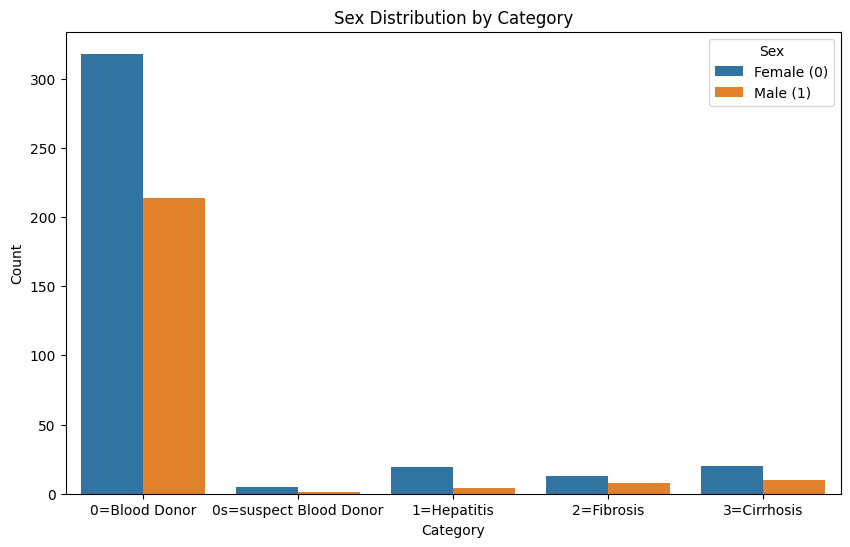

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df["Category"], hue=df["Sex"])
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Sex Distribution by Category")
plt.legend(title="Sex", labels=["Female (0)", "Male (1)"])
plt.show()

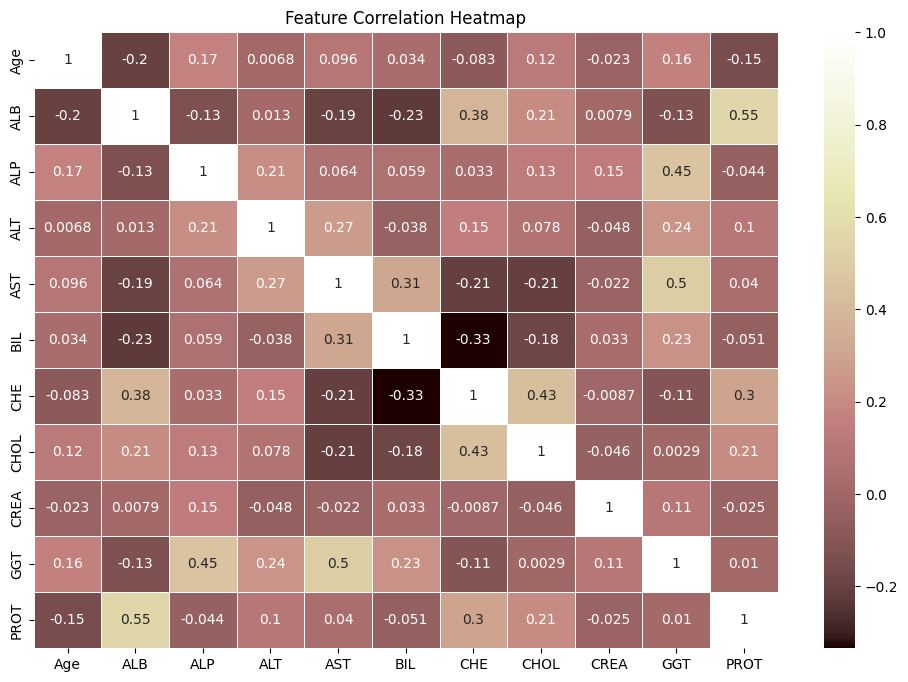

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns to avoid errors
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="pink", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encode the Category column
df['Category'] = le.fit_transform(df['Category'])
df['Sex'] = le.fit_transform(df['Sex'])

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
columns_to_impute=['Age','Sex','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=["Category"])
y = df["Category"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
ConfusionMatrix=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", ConfusionMatrix)



Accuracy: 0.8861788617886179
Recall: 0.8861788617886179
Precision: 0.855054320454709
F1 Score: 0.8671922476800525
Confusion Matrix:
 [[106   0   0   1   0]
 [  1   0   0   0   0]
 [  4   0   0   1   0]
 [  0   0   2   1   1]
 [  2   0   0   2   2]]


c:\Users\X1 Carbon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
sample_data = pd.DataFrame([
    [62, 0, 32.0, 416.6, 5.9, 110.3, 50.0, 5.57, 6.30, 55.7, 650.9, 68.5],
    [70, 0, 40.0, 97.9, 15.1, 15.9, 6.8, 11.46, 5.08, 62.0, 19.2, 65.3],
    [47, 1, 22.5, 124.0, 79.5, 46.7, 2.3, 6.83, 4.3, 170.0, 345.6, 58.6],
    [19, 1, 41.0, 0.0, 87.0, 67.0, 12.0, 7.55, 3.9, 62.0, 65.0, 75.0]
],columns=["Age", "Sex", "ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT", "PROT"])
print(X.describe())
print(sample_data.describe())

              Age         Sex         ALB         ALP         ALT         AST  \
count  612.000000  612.000000  612.000000  612.000000  612.000000  612.000000   
mean    47.418301    0.612745   41.655155   68.140504   28.293290   34.745098   
std      9.972213    0.487521    5.737645   25.579387   25.310794   33.133880   
min     23.000000    0.000000   14.900000   11.300000    0.900000   10.600000   
25%     39.000000    0.000000   38.800000   52.900000   16.400000   21.600000   
50%     47.000000    1.000000   42.000000   66.500000   23.000000   25.900000   
75%     54.000000    1.000000   45.225000   79.300000   32.925000   32.900000   
max     77.000000    1.000000   82.200000  416.600000  325.300000  324.000000   

              BIL         CHE        CHOL         CREA         GGT        PROT  
count  612.000000  612.000000  612.000000   612.000000  612.000000  612.000000  
mean    11.418137    8.194592    5.372791    81.205882   39.024673   72.072340  
std     19.717050    2.2062

In [20]:
print("Known label classes:", le.classes_)
print("Encoded values:", list(enumerate(le.classes_)))
sample_data = sample_data[X.columns]
sample_data_scaled = scaler.transform(sample_data)
predicted_categories = model.predict(sample_data_scaled)
predicted_labels = le.inverse_transform(predicted_categories)

print("Predicted raw values from model:", predicted_categories)

Known label classes: ['f' 'm']
Encoded values: [(0, 'f'), (1, 'm')]


ValueError: y contains previously unseen labels: [2 4]

In [ ]:
sample_data = sample_data[X.columns]
sample_data_scaled = scaler.transform(sample_data)
predicted_categories = model.predict(sample_data_scaled)
predicted_labels = le.inverse_transform(predicted_categories)

# Define actual labels (replace with real class names)
actual_classes = ['Blood Donor', 'Suspect Blood Donor', 'Hepatitis', 'Fibrosis']
actual_labels = le.transform(actual_classes)

for i, (pred, actual) in enumerate(zip(predicted_categories, actual_labels)):
    correct = '✅ Correct' if pred == actual else '❌ Incorrect'
    print(f"Row {i+1} → Predicted: {predicted_labels[i]} | Actual: {actual_classes[i]} | {correct}")


ValueError: y contains previously unseen labels: [2 4]

In [ ]:
sample_data = sample_data[X.columns]
sample_data_scaled = scaler.transform(sample_data)
predicted_categories = model.predict(sample_data_scaled)
predicted_labels = le.inverse_transform(predicted_categories)

actual_labels = le.transform(['Blood Donor', 'Suspect Blood Donor', 'Hepatitis', 'Fibrosis'])  # replace with real ones

for i, (pred, actual) in enumerate(zip(predicted_categories, actual_labels)):
    print(f"Row {i+1} → Predicted: {pred} | Actual: {actual} | {'✅ Correct' if pred == actual else '❌ Incorrect'}")

print(f"Predicted Categories: {predicted_categories}")
actual_labels = [4, 3, 2, 1]
for i, (pred, actual) in enumerate(zip(predicted_categories, actual_labels)):
    print(f"Row {i+1} → Predicted: {pred} | Actual: {actual} | {'✅ Correct' if pred == actual else '❌ Incorrect'}")


ValueError: y contains previously unseen labels: [2 4]